# Introduction

This manual defines and documents the conventions, methodology, and information flow associated with the System Advisor Model (SAM) physical trough model in the System Advisor Model [10]. A detailed overview of each subsystem is provided, with the engineering/mathematical basis laid out where appropriate. While this documentation contains general information on the model structure, the beginning modeler may find portions of the content challenging. For an introductory overview on how to use the model, please refer to the System Advisor help system. Definitions of technical terms (denoted with _italic_ text) are provided in the Glossary of Terms at the end of this document (page 112).

The System Advisor Model provides a consistent framework for analyzing and comparing power system costs and performance across the range of solar technologies and markets, from photovoltaic (PV) systems for residential and commercial markets to concentrating solar power and large PV systems for utility markets.

System Advisor is based on an hourly simulation engine that interacts with performance, cost, and finance models to calculate energy output, energy costs, and cash flows. The software can also account for the effect of incentives on cash flows. System Advisor's spreadsheet interface allows for exchanging data with external models developed in Microsoft(r) Excel. Most of System Advisor's inputs can be used as parametric variables for sensitivity studies to investigate impacts of variations in performance, cost, and financial parameters on model results.

## _TRNSYS simulation framework_

System Advisor models system performance using the TRNSYS1 software developed at the University of Wisconsin combined with customized components. TRNSYS is a validated, time-series simulation program that can simulate the performance of photovoltaic, concentrating solar power, water heating systems, and other renewable energy systems using hourly resource data. TRNSYS is integrated into System Advisor so there is no need to install TRNSYS software or be familiar with its use to run Solar Advisor.

Footnote 1: For more information on the TRNSYS software, refer to documentation from the University of Wisconsin at sel.me.wisc.edu/trnsys/default.htm

The default source code folder \SAM\<version number>\exelib\trnsys\source contains the FORTRAN code for each TRNSYS module: sam_mw_trough_Type250.f90 (solar field), sam_mw_trough_Type251.f90 (storage and dispatch), sam_mw_pt_Type224.f90 (power cycle), and the shared HTF property subroutines sam_mw_pt_Type229.f90 and sam_mw_pt_propmod.

## _Variable Names and Abbreviations_

The following tables contain information and conventions used in this document. Table 1 lists the abbreviations, Table 2 lists variable naming conventions, and Table 3 list commonly used variable subscript conventions.

\begin{array}{l|l}
\textbf{Abbreviation} & \textbf{Description} \\
\hline
ACC & Air-cooledcondenser \\
CSP & Concentrating SolarPower \\
DNI & Direct-normal irradiation \\
HTF & Heat transfer fluid \\
IAM & Incidence anglemodifier \\
IOCop & Inlet/outlet/cross-overpipe \\
ITD & Initial temperaturedifference \\
LHV & Lowerheatingvalue \\
NREL & National RenewableEnergyLaboratory \\
SAM & System AdvisorModel \\
TES & Thermal energystorage \\
TOU & Timeofuse \\
\hline
\end{array}

\begin{array}{|l|l|l|l|}
\hline
\textbf{Name} & \textbf{Description} & \textbf{Units} & \textbf{Units Abbrv.} \\
\hline
A & Area & meters squared & m^2 \\
c, c_{p} & Specific heat & Joules per kilogram Kelvin & \frac{J}{kgK} \\
C & Calculation coefficient & varies & varies \\
\dot{C} & Thermal capacity rate & Watts per Kelvin & \frac{W}{K} \\
D & Diameter & meters & m \\
E & Energy & Joules & J \\
g & Gravitation constant & meters per sq. second & \frac{m}{s^2} \\
f & Fraction & none & none \\
fr & Friction factor & none & none \\
h & Enthalpy & Joules per kilogram & \frac{J}{kg} \\
H & Height & meters & m \\
i,j & Counting indexes & none & none \\
I_{bn} & Direct solar irradiation & Watts per sq. meter & \frac{W}{m^2} \\
k & Thermal conductivity & Watts per meter-Kelvin & \frac{W}{m\cdot K} \\
L & Length & meters & m \\
m & Mass & kilograms & kg \\
\dot{m} & Mass flow rate & kilograms per second & \frac{kg}{s} \\
(mc) & Thermal inertia & Joules per Kelvin & \frac{J}{K} \\
N & Integer number & none & none \\
Nu & Nusselt number & none & none \\
P & Pressure & Pascals & Pa \\
Pr & Prandtl number & none & none \\
\dot{q} & Heat transfer rate & Watts & W \\
\dot{Q} & Cycle heat absorption rate & Watts & W \\
r & Ratio & none & none \\
R & Radius & meters & m \\
\dot{R} & Thermal resistance & Watts per Kelvin & \frac{W}{K} \\
Ra & Rayleigh number & none & none \\
Re & Reynolds number & none & none \\
s & Entropy & Joules per kilogram Kelvin & \frac{J}{kg} \\
T & Temperature & Kelvin & K \\
\overline{T} & Average temperature & Kelvin & K \\
t & Time & seconds & s \\
u & Specific internal energy & Joules per kilogram & \frac{J}{kg} \\
U & Internal energy & Joules & J \\
UA & Thermal conductance & Watts per Kelvin & \frac{W}{K} \\
v & Velocity & meters per second & \frac{m}{s} \\
\overline{V} & Volume & meters cubed & m^3 \\
\dot{W} & Cycle power output & Watts & W \\
\hline
\end{array}

\begin{array}{|l|l|l|l|}
\hline
\textbf{Name} & \textbf{Description} & \textbf{Units} & \textbf{Units Abbrv.} \\
\hline
\alpha & Absortance & none & none \\
\beta & Volumetric expansion coef. & inverse Kelvin & \frac{1}{K} \\
\Delta & Change in value & none & none \\
\gamma & Thermal loss coefficient & Watts per sq. meter Kelvin & \frac{W}{m^{2}\cdot K} \\
\gamma_{sol} & Solar azimuth & degrees & \circ \\
\delta & Solar declination & degrees & \circ \\
\eta & Efficiency & none & none \\
\theta & Aperture incidence angle & degrees & \circ \\
\theta_{e}/\theta_{z} & Solar elevation/zenith & degrees & \circ \\
\varepsilon & Emittance / Effectiveness & none & none \\
\mu & Dynamic viscosity & Pascal-seconds & Pa\cdot s \\
\nu & Kinematic viscosity & sq. meters per second & \frac{m^{2}}{s} \\
\pi & Pi & none & none \\
\rho & Density & kilograms per cubic meter & \frac{kg}{m^{3}} \\
\tau & Transmittance & none & none \\
\phi & Latitude & degrees & \circ \\
\chi & Thermodynamic quality & none & none \\
\psi & Longitude & degrees & \circ \\
\omega & Hour angle & degrees & \circ \\
\hline
\end{array}

\begin{array}{|l|l|l|l|} \hline
0 & \text{Previous value / initial value} & h_{\text{rsec}} & \text{Header section} \\
1..9 & \text{Item } n \text{ in a sequence} & h_{\text{grp}} & \text{Header section groups} \\ 
_{\text{tank}} & \text{Single tank} & h_{\text{l}} & \text{Heat loss} \\ 
_{.4} & \text{Available} & h_{\text{sec}} & \text{Header sections} \\ 
_{\text{abs}} & \text{Absorbed} & h_{\text{tf}} & \text{Heat transfer fluid} \\ 
_{\text{adj}} & \text{Adjusted} & h_{\text{yd}} & \text{Hydraulic} \\ 
_{\text{air}} & \text{Ambient air} & h_{\text{x}} & \text{Heat exchanger} \\ 
_{\text{amb}} & \text{Ambient} & \text{in} & \text{Inlet} \\ 
_{\text{ap}} & \text{Aperture} & \text{inc} & \text{Incident} \\ 
_{\text{approach}} & \text{Approach temperature} & \text{loop} & \text{All SCA’s in a loop} \\ 
_{\text{aux}} & \text{Auxiliary (fossil)} & \text{LHV} & \text{Lower heating value} \\ 
_{\text{ave}} & \text{Average} & m & \text{Mirror} \\ 
_{\text{bal}} & \text{Balance-of-plant} & \text{min} & \text{Minimum} \\ 
_{\text{bd}} & \text{Blowdown} & \text{max} & \text{Maximum} \\ 
_{\text{boil}} & \text{Steam boiler} & \text{ND} & \text{Non-dimensional, normalized} \\ 
_{\text{brae}} & \text{Bracket} & \text{net} & \text{Net electric} \\ 
c & \text{Cold} & \text{opt} & \text{Optical} \\ 
_{\text{cap}} & \text{Capacity} & \text{out} & \text{Outlet} \\ 
_{\text{calc}} & \text{Calculated} & p & \text{Pump} \\ 
_{\text{chg}} & \text{Charging} & \text{par} & \text{Parasitic} \\ 
_{\text{col}} & \text{Collector} & \text{pb} & \text{Power block (or power cycle)} \\ 
_{\text{cond}} & \text{Conduction / condenser} & \text{pm} & \text{Per meter basis} \\ 
_{\text{conv}} & \text{Convection} & \text{rad} & \text{Radiation} \\ 
_{\text{cs}} & \text{Cross-sectional} & \text{rec} & \text{Receiver} \\ 
_{\text{cw}} & \text{Cooling water} & \text{rej} & \text{Rejected} \\ 
_{\text{cycle}} & \text{Power cycle} & \text{run} & \text{Runner pipe} \\ 
_{\text{db}} & \text{Dry-bulb} & \text{runsec} & \text{Runner section} \\ 
_{\text{def}} & \text{Defocus} & s & \text{Isentropic} \\ 
_{\text{dem}} & \text{Demand} & \text{sby} & \text{Standby} \\ 
_{\text{des}} & \text{Design point} & \text{sca} & \text{Solar collector assembly} \\ 
_{\text{dis}} & \text{Discharging} & \text{setpoint} & \text{Design point or setpoint} \\ 
_{\text{drift}} & \text{Condenser drift} & \text{sf} & \text{Solar field} \\ 
_{\text{dump}} & \text{Dumped energy} & \text{sol} & \text{Solar} \\ 
_{\text{duy}} & \text{Heat exchanger duty} & \text{spacing} & \text{Row spacing} \\ 
e & \text{Electric} & \text{st} & \text{Steam} \\ 
_{\text{env}} & \text{Envelope} & \text{start} & \text{Startup} \\ 
f & \text{Focal} & \text{sys} & \text{System} \\ 
_{\text{fan}} & \text{Cooling fan} & \text{tes} & \text{Thermal energy storage} \\ 
_{\text{fin}} & \text{Final} & \text{th} & \text{Thermal} \\ 
_{\text{fsec}} & \text{Field sections} & \text{tot} & \text{Total} \\ 
_{\text{fuel}} & \text{Fossil fuel} & \text{tou} & \text{Time of use} \\ 
g & \text{Guess} & \text{track} & \text{Collector tracking} \\ 
_{\text{gross}} & \text{Gross electric} & \text{trans} & \text{Transient} \\ 
_{\text{fp}} & \text{Freeze protection} & w & \text{Water} \\ 
h & \text{Hot} & \text{wb} & \text{Wet-bulb} \\ 
_{\text{hdr}} & \text{Header} & \uparrow/\downarrow & \text{Increase / Decrease} \\ 
\hline 
\end{array}

## Background and Modeling Approach

The physical trough model characterizes a parabolic trough CSP plant by deriving performance equations from first principles of heat transfer and thermodynamics where possible. In practice, this means that empirical "curve-fit" relationships are eliminated to the degree that is practical for the type of modeling analysis done in System Advisor. The primary benefit of this approach is the added flexibility in changing system parameters and component properties at a fundamental level (i.e. absorber emissivity, glass thickness, etc.) and simulating their impact on overall system performance. With this increased flexibility come a few drawbacks; these include the addition of multiple layers of modeling uncertainty and the increased opportunity for divergence in the results from a real system. While an empirical model can produce high accuracy over the range of parameters used in its development, such models cannot provide predictive performance outside these ranges. Both the physical and empirical trough models are included in System Advisor to allow for comparisons between the physical and empirical modeling approaches.

Besides fulfilling the goal of deriving system performance from first principles, the physical modeling approach achieves several other objectives: the model includes transient effects related to the thermal capacity of the HTF in the field piping, headers, and the balance of the plant; it allows for more flexible field component specification, including multiple receiver and collector types within a single loop; it maintains a reasonably short run-time allowing for parametric and statistical analyses; and it makes use of existing models where possible. Previously existing subsystem models that are adapted and incorporated into the physical model include the collector model from System Advisor's empirical trough model, the receiver heat loss model [8], a field piping pressure drop model [14], and the power cycle performance model [20] originally developed for System Advisor's power tower CSP system model. These models are discussed in more detail in dedicated sections of this report.

# Solar Field

The solar field is the heat-collecting portion of the plant. It consists of one or more _loops_ of solar collector assemblies (_SCA's_), with each loop laid out in parallel. A common _header_ pipe provides each loop with an equal flow rate of heat transfer fluid (HTF), and a second header collects the hot HTF to return it either directly to the _power cycle_ for power generation or to the thermal energy storage system for use at a later time. To minimize pumping pressure losses, the field is typically divided into multiple sections, each section with its own header set, and the power cycle is situated near the middle of the field. Figure 1 shows one possible plant layout where two header sections are used for 20 total loops.

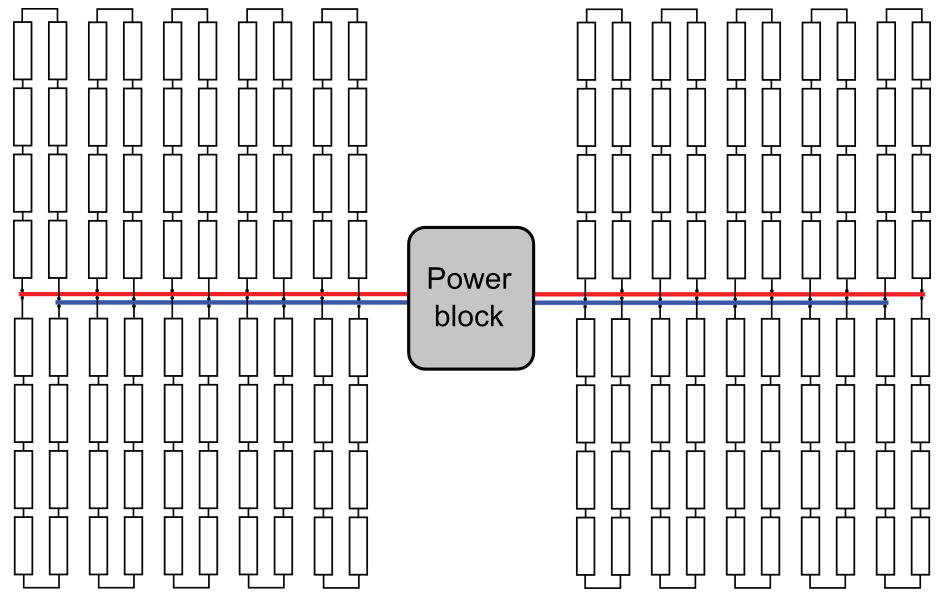

Figure 1: Onepossible field arrangement, where the field is broken up into two header sections.
Each loop in this illustration contains 8 individual SCA’s, and each portion of the header is connected to two loops-one on the top and one on the bottom of the image.

## Energy balance

Within each loop, a number of SCA's are used to incrementally heat the HTF to the design outlet temperature. Each SCA is composed of a number of parabolic _collectors_ and their _receivers2_ in series that share a single common tracking drive. In this model, the SCA serves as the lowest level of discretization. Each SCA is treated as an independent calculation node within the loop, and the absorbed energy, losses, temperature, pressure drop, and other performance values are calculated independently for each SCA. This allows each SCA to impact performance separately and potentially allows each SCA to contain different receiver and/or collector attributes. System Advisor allows the user to specify unique geometry and performance characteristics for each SCA in the loop up to a limit of four unique configurations. The order in which the SCA's are defocused in the loop during high-flux conditions can also be modified under this framework. Figure 2 illustrates these principles.

Figure 1: One possible field arrangement, where the field is broken up into two header sections. Each loop in this illustration contains 8 individual SCA’s, and each portion of the header is connected to two loops - one on the top and one on the bottom of the image.

### Nodal Energy Balance
A typical steady-state receiver model determines the temperature rise across the node by considering the absorbed energy, the mass flow rate of HTF through the receiver, and the specific heat of the HTF. This energy balance for node \(i\) is represented in Eq.[2.1].

$$\Delta T_{i}=T_{out,i}-T_{in,i}=\frac{\dot{q}_{abs}}{\dot{m}_{htf}\,c_{htf}} \tag{2.1}$$

However, in the case of the parabolic trough technology, the thermal inertia associated with the energy state of the node can impact performance to the extent that a steady-state model is insufficient; thus transient terms must be included. The most significant transient effect in the solar field is the thermal mass of the HTF in the headers and in the receiver piping, so we need to consider the change in energy of the HTF in deriving the energy balance equations. We'll start with the energy balance for a single SCA node drawn in Figure 3.

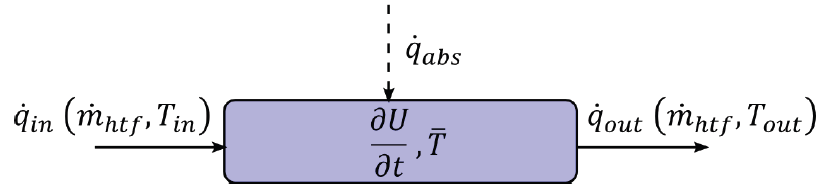

Figure 3:EnergybalanceforthereceiversinanSCA.Theenclosedboxrepresentsthecontrol volume, encompassingtheHTFwithintheabsorbertubesandpipingforasingleSCA.

The energy balance above shows a receiver tube with an inlet flow, outlet flow, absorbed energy (net absorption is positive, net loss is negative), and an internal energy term. The $\dot{q}$ heat flows are functions of the mass flow rate $\left(\dot{m}_{htf}\right)$ which is constant across the boundary, and the temperatures $T_{in}$ and $T_{out}$. The average nodal temperature $\overline{T}$ is equal to the average of the inlet and outlet temperatures of the calculation node, since the temperature rise across the node is assumed to be linear.

The internal energy term $\frac{\partial U}{\partial t}$ represents the change in energy of the node as a function of time $t$. Equivalently, this term can be expressed as:

$$\frac{\partial U}{\partial t}=\left(m\;c_{htf}+(mc)_{bal,sca}\;L\right)\;\frac {\partial T}{\partial t} \tag{2.2}$$

Here, $m$ is the mass of the HTF contained in the node, $L$ is the length of a single SCA, and $c_{htf}$ is the specific heat of the HTF. An additional thermal inertia term $\left(mc\right)_{bal,sca}$ is included to account for the thermal mass of piping, joints, insulation, and other SCA components that thermally cycle with the HTF. The $\left(mc\right)_{bal,sca}\;L$ term is dimensionally equivalent to the HTF capacitance term $m\cdot c_{htf}$, even though it is input into the model as a single value. This convention eliminates the need for specific knowledge of either the exact mass or specific heat of the additional thermal inertia while still allowing the user to account for the inertia effect. This term is dimensionally defined to represent the amount of thermal energy per meter of collector length required to raise the temperature of the node one degree K. The input units are $\frac{{W}t-h}{{m-K}}$, and the value is converted within the code to units of $\frac{{J}}{{m-K}}$.

Note that in terms of the mathematical formulation, the HTF and material properties are assumed to be constant. However, when evaluating system performance, **material and HTF thermal properties are evaluated as functions of temperature** (and pressure, if applicable).

The total energy balance in the control volume is:

$$\dot{q}_{in}+\dot{q}_{abs}=\frac{\partial U}{\partial t}+\dot{q}_{out} \tag{2.3}$$

The inlet and outlet heat flows can be expressed as:

$$\dot{q}_{in}-\dot{q}_{out} = \dot{m}_{htf}\;c_{htf}\;\left(T_{in}-T_{out}\right)$$
$$= 2\;\dot{m}_{htf}\;c_{htf}\;\left(T_{in}-\overline{T}\right)\tag{2.4}$$

Substituting this equation and the definition for the internal energy term into the energy balance equation, then solving for the first differential, the result is:

$$\frac{\partial\overline{T}}{\partial t}=\frac{2\;\dot{m}_{htf}(T_{in}- \overline{T})+\dot{q}_{abs}}{m\;c_{htf}+(mc)_{bal,sca}} \tag{2.5}$$

This is a linear first order differential equation, which has the general solution:

$$\overline{T}=\frac{\dot{q}_{abs}}{2\ \dot{m}_{htf}\cdot c_{htf}}+C_{1}\exp\left[- \frac{2\ \dot{m}_{htf}\ c_{htf}}{m\ c_{htf}+(mc)_{bal,sca}}\Delta t\right]+T_{in} \tag{2.6}$$

This equation has an unknown constant $C_{1}$ that can be determined by enforcing a boundary condition. In this situation, we know that the average nodal temperature $\overline{T}=\overline{T}_{0}$ at the beginning of the time step when $t=0$, and we define $\overline{T}_{0}$ to be the temperature $\overline{T}$ at the end of the previous time step (the average temperature is $\overline{T}=\frac{T_{out}+T_{in}}{2}$. Thus, solving for the unknown constant $C_{1}$:

$$\overline{T}_{0} = \overline{T}|_{t=0}$$

$$= \frac{\dot{q}_{abs}}{2\cdot\dot{m}_{htf}\ c_{htf}}+C_{1}e^{0}+T_{ in}$$ 

$$C_{1} = \overline{T}_{0}-\frac{\dot{q}_{abs}}{2\cdot\dot{m}_{htf}\ c_{ htf}}-T_{in} \tag{2.7}$$

Finally, we substitute the constant into the general solution to find the final equation for the outlet temperature from each SCA shown in Eq.[2.8].

$\text{For } i=1, N_{\text{sca}}:$

$$T_{out,i} = 2\ \overline{T}_{i}-T_{in,i}$$

$$T_{out,i} = \frac{\dot{q}_{abs,i}}{\dot{m}_{htf}\ c_{htf,i}}+T_{in,i} \tag{2.8}$$

 $$+2\cdot\left(\overline{T}_{0,i}-\frac{\dot{q}_{abs,i}}{2\cdot \dot{m}_{htf}\ c_{htf,i}}-T_{in,i}\right)\exp\left[\frac{-2\ \dot{m}_{htf}\ c_{htf,i}\ \Delta t}{m_{i}\ c_{htf,i}+mc_{i,bal,sca}\ L_{i}}\right]$$

This equation is applied to each node $i$ in the loop, where $T_{in,i}$ is equal to the outlet temperature of the previous node in the loop, $T_{out,i-1}$. Since the calculated temperature for each node depends on both the inlet temperature of the previous node and the node temperature from the previous time step, these values must be established as boundary conditions. The temperature of the node at the previous time step is stored from time step to time step, and the inlet temperature is set equal to the outlet temperature of the previous node for each but the first node in the loop to satisfy these requirements. The HTF mass of each node is calculated as a function of the receiver piping volume and the local HTF density.

$\text{For } i=1, N_{\text{sca}}:$

$$m_{i}=\rho_{htf,i}\ L_{i}\ A_{cs,i} \tag{2.9}$$

The inlet temperature at the first node, representing the inlet of the entire field, requires additional consideration. In a similar derivation process as the one described in Figure 3, a "system" temperature is calculated for both the hot and cold sides of the solar field. The cold system temperature is used as the node #1 inlet temperature, and the hot system temperature is used as the effective solar field outlet temperature. These values incorporate the thermal inertia associated with the header and balance-of-plant HTF mass. Under steady-state conditions, the loop inlet HTF temperature equals either:

* the power cycle outlet temperature
* the storage loop outlet temperature
* a mass-flow weighted average of the storage and power cycle outlet temperatures
* or the solar field outlet temperature (during nighttime recirculation)

depending on the control situation. However, directly using any of these outlet temperatures as the loop inlet value is inaccurate because it fails to account for the thermal inertia of the header. If we include thermal inertia as a transient effect, the derived equation for loop inlet temperature (denoted $T_{sys,c}$) is shown in Eq.[2.10].

$$T_{sys,c}=\left(T_{sys,c,0}-T_{sf,in}\right)\exp\left[-\frac{\dot{m}_{hf}}{\overline{V} _{c}\cdot\rho_{c}+\frac{(mc)_{bal,c}}{c_{c}}}\Delta t\right]+T_{sf,in} \tag{2.10}$$

Here, the cold header temperature from the last time step is $T_{sys,c,0}$, the volume in the cold header and the runner pipe is given by $\overline{V}_{c}$, and cold fluid density is $\rho_{c}$. Analogously, the hot system outlet temperature combines loop outlet flow, the header and runner pipe volumes, and the state of the system at the last time step.

$$T_{sys,h}=\left(T_{sys,h,0}-T_{loop,out}^{*}\right)\exp\left[-\frac{\dot{m}_{hf}}{ \overline{V}_{h}\cdot\rho_{h}+\frac{(mc)_{bal,h}}{c_{h}}}\Delta t\right]+T_{ loop,out}^{*} \tag{2.11}$$

Here, $T_{loop,out}^{*}$ represents the heat-loss adjusted loop outlet temperature calculated in Eq. [2.26]. The capacity term $(mc)_{bal,h}$ (or $(mc)_{bal,c}$ for the cold header) is used to account for any thermal inertia that isn't included in the HTF volume calculations. Varying this term effectively adds or subtracts internal energy capacity to the HTF in the system; its best use is as an empirical adjustment factor to help match observed plant performance. This variable is defined in terms of the thermal power (kilowatt hours) per gross electricity capacity (Megawatts) needed to raise the header temperature one degree Celsius. The $(mc)_{bal,h}$ term is applied specifically to the temperature calculation for the hot header, while $(mc)_{bal,c}$ describes only the additional cold header thermal inertia.

To illustrate this concept, consider the following example. A hypothetical 100 $MWe$ (gross) trough plant with a 35% conversion efficiency is observed starting up from a cold overnight temperature of $140^{\circ}C$. The system temperature increases a total of $150^{\circ}C$ to $290^{\circ}C$ after 1 hour of running the solar field at full load. A modeler predicts from known HTF inventory that the plant should have reached its startup temperature in only 30 minutes. Thus, the $\left(mc\right)_{bal}$ terms must together account for an half of the full-load hour that the plant took to start up. Assuming both coefficients are equal, the hot-side coefficient would be calculated as follows:

$$\begin{array}{rcl}(mc)_{bal,h}&=&\frac{0.5}{2\cdot 0.35}\cdot\frac{100,000[kWe]}{ 100[MWe]\cdot 150[K]}\\ \\ (mc)_{bal,h}&=&4.8\left[\frac{kWhr}{MWe_{cap}\cdot K}\right]\end{array} \tag{2.12}$$

Realistically, the value calculated here will be lower once the thermal inertia of the solar field piping, insulation, and joints are considered. This calculation is only provided as a demonstration of the procedure for determining an empirical thermal inertia term, and the user should carefully select their input to model their desired system.

Section 2.1 Summary

* The model calculates solar field temperatures and corresponding performance values independently at each SCA specified in the loop.
* Each SCA can have a different associated collector or receiver, up to four in total.
* The performance of one loop is representative of each loop in the field.
* The model determines the solar field inlet temperature by accounting for the return flow from storage/power cycle/field outlet and the volume of the cold header and piping.
* The model determines the solar field outlet temperature by accounting for the hot flow from the collection elements, the volume of the hot header and piping, and it adds user-specified thermal capacity terms that impact the transient behavior of the system.

### Solar Field Control

CSP plants convert direct normal irradiation (DNI) from the sun into thermal energy and eventually into electricity or some other useful product. DNI can vary significantly over a relatively short period of time, and the solar field in a trough plant must be designed to handle these variations. The solar field control algorithm uses user-specified input to make operational decisions based on the DNI resource level, ambient temperature, presence of thermal storage, etc. The minimum HTF mass flow rate, the maximum HTF mass flow rate, the HTF outlet temperature, defocus state, and the temperature of each node relative to the freeze-protection set point are parameters that are monitored and enforced by the field controller.

The field logic employs an "ideal" control strategy. This means that the HTF mass flow rate is controlled to allow the loop outlet temperature to meet the design point value when possible. Receiver heat loss and surface temperature are both functions of the HTF temperature, and HTF temperature in turn is a function of HTF mass flow rate, so the HTF temperature must be calculated iteratively. System Advisor uses successive substitution, where an initial estimate for the field mass flow rate is provided along with guessed temperature values, then the mass flow rate is recalculated and adjusted until the outlet temperature converges to the design value.

If the mass flow rate is calculated to fall outside of the acceptable range specified by the user, special control handling is required. The minimum and maximum allowable loop flow rates are specified indirectly by the user on the System Advisor Solar Field page through an allowable HTF velocity range. Eq.[2.13] shows how the minimum $\left(v_{htf,min}\right)$ and the maximum $\left(v_{htf,max}\right)$ HTF velocities are converted to mass flow rates.

$$\dot{m}_{htf,min} = v_{htf,min}\;\rho_{htf,c}\;\pi\;\left(\frac{D_{min}}{2}\right)^{2}$$
$$\dot{m}_{htf,max} = v_{htf,max}\;\rho_{htf,h}\;\pi\;\left(\frac{D_{min}}{2}\right)^{2} \tag{2.13}$$

Here, $\rho_{htf}$ represents the HTF density at the cold $\left(c\right)$ and hot $\left(h\right)$ design temperatures, and $D_{min}$ is the minimum diameter receiver tube that is present in the system.

The solar field mass flow rate is constantly adjusted within the upper and lower flow limits to maintain the desired HTF outlet temperature. Several methods of calculation are possible for determining the mass flow rate. System Advisor uses a customized numerical solution algorithm that considers the rate of change in the mass flow rate and HTF outlet temperature variables from iteration to iteration. Numerical techniques generally require an initial guess value, and this is the case for System Advisor. The initial mass flow guess is shown in Eq.[2.14].

$$\dot{m}_{htf,guess}=\frac{\sum_{i=1}^{N_{sca}}\dot{q}_{i,abs}\;N_{loops}}{c_{ htf,ave}\;(T_{loop,out,des}-T_{sf,in})} \tag{2.14}$$

Note that the average specific heat value refers to the integral average over the length of the collector loop, the HTF outlet temperature is the solar field design outlet temperature, and the inlet temperature is equal to the value provided by the power block or fluid source. Subsequent iterations depart from this energy balance basis by using the mass flow and temperature values from the previous iteration ($\dot{m}^{\prime}_{htf}$ and $T^{\prime}_{loop,out}$, respectively), and the values from the current iteration ($\dot{m}_{htf}$ and $T_{loop,out}$) to predict the mass flow for the next iteration ($\dot{m}^{*}_{htf}$). This calculation is shown in Eq.[2.15].

$$\dot{m}^{*}_{htf}=\dot{m}_{htf}+(\dot{m}_{htf}-\dot{m}^{\prime}_{htf})\cdot \left(\frac{T_{loop,out,des}-T_{loop,out}}{T_{loop,out}-T^{\prime}_{loop, out}}\right) \tag{2.15}$$

where:

$$-0.75\ \left|\dot{m}_{htf}\right|\leq\left[(\dot{m}_{htf}-\dot{m}^{\prime}_{htf})\cdot \left(\frac{T_{loop,out,des}-T_{loop,out}}{T_{loop,out}-T^{\prime}_{loop,out}} \right)\right]\leq 0.75\ \left|\dot{m}_{htf}\right| \tag{2.16}$$

The limits of $[-.75,+.75]$ in Eq. [2.16] were selected to promote model convergence and do not reflect any physical limit on the bounds of the mass flow rate. The limits apply from iteration-to-iteration within a single time step, while time-step-to-time-step variations in the mass flow rate may exceed these limits.

### 2.2.1 _Collector defocusing_

If the calculated mass flow rate through the loop falls below the minimum allowable flow rate $\left(\dot{m}_{htf,min}\right)$, then the code resets the flow rate to be equal to this minimum value and recalculates the outlet temperature of the loop, assuming a fixed flow rate. Thus, in conditions where the minimum criterion is not met, the outlet temperature from the field will fall below the design value.

In the opposite case, the solar field may absorb so much energy that the mass flow rate required to maintain the design outlet temperature exceeds the maximum specified value. Once the mass flow rate reaches an upper limit, the only way to avoid over-temperature HTF (and a dangerous situation) is to reduce the amount of absorbed energy by defocusing collectors. The plant controller can defocus collectors either when the amount of energy produced by the solar field exceeds what can be consumed in the power cycle and/or storage, or when the converged mass flow rate exceeds the value calculated in Eq.[2.13]. For the latter case, the logic considers the total amount of absorbed energy in each SCA in the field and defocuses the SCA's until the total absorbed energy falls below the threshold required by the maximum mass flow rate.

SCA's are defocused using one of three user-selected schemes.

#### Full SCA Defocusing

The first option allows the user to specify an order in which each SCA in a loop should be defocused. During defocusing periods, the SCA's will be completely defocused in successive order until the total absorbed power falls below the imposed limit. Note that thermal losses incurred by the defocused SCA(s) are still accounted for in all energy calculations. Eq.[2.17] shows how the code determines the number of collectors to defocus. The total effective thermal output power $q_{sf,eff}$ is reduced by the amount absorbed in each collector according to defocus order until the maximum allowable thermal output $q_{sf,limit}$ is met.The array items $A[i]$ indicate the order of defocusing requested by the user, and the subscripts $abs$, $hl$, and $inc$ refer to the absorbed thermal energy, thermal heat losses, and irradiation on each SCA, respectively.

For $i=1,N_{sca}$:

_And while_ $\dot{q}_{sf,eff}>\dot{q}_{sf,limit}$ and $i<=N_{sca}$:

$$\dot{q}_{sf,eff}=\dot{q}_{sf,eff}-\max\left[\left(\dot{q}_{A[i],abs}-\dot{q}_ {A[i],hl}\right),0\right] \tag{2.17}$$
_Then, for_ $j=1,i$:

$$\dot{q}_{i,inc}=0$$

This option is activated by clearing the **Allow partial defocusing** check box on the Solar Field page.

#### Partial Sequenced Defocusing

The second option also allows sequenced defocusing of SCA's, but instead of completely defocusing the SCA's, partial defocusing is allowed. Sometimes called feathering, this practice is implemented in real plants by modulating the tracking angle to partially shift the receiver out of the reflected radiation, thus reducing the intercept factor. This control scheme sequentially defocuses the SCA's according to the order specified on the Solar Field page, but allows one SCA to be defocused partially. The defocusing calculations in this mode require three steps: first, the number of affected SCA's is determined, second, the SCA's that are wholly unneeded are completely defocused, and third, the final defocused SCA is partially modulated to match the desired thermal output.

_For_ $i=1,N_{sca}$:

_And while_ $\dot{q}_{sf,eff}>\dot{q}_{sf,limit}$ and $i<=N_{sca}$:

$$\dot{q}_{sf,eff}=\dot{q}_{sf,eff}-\max\left[\left(\dot{q}_{A[i],abs}-\dot{q}_{ A[i],hl}\right),0\right] \tag{2.18}$$

_Then, for_ $j=1,i-1$:

$$\dot{q}_{i,inc}=0$$

_Finally, for_ $j=i$:

$$\dot{q}_{i,inc}=\dot{q}_{i,inc}\,\frac{\dot{q}_{sf,eff}-\sum_{j=i+1}^{N_{sca}} \dot{q}_{i,abs}}{\dot{q}_{i,abs}} \tag{2.19}$$

This option is selected by enabling the **Allow partial defocusing** check box and selecting the **Sequenced** option from the drop down menu.

#### Partial Simultaneous Defocusing

The final option implements defocusing by simultaneously partially defocusing all of the SCA's in the loop. Because all SCA's are defocused equally, the defocus order specified in the loop configuration control on the Solar Field page is disregarded. Eq.[2.20] shows the simple scaling method used for each SCA.

_For_ $i=1,N_{sca}$:

$$\dot{q}_{i,inc}=\dot{q}_{i,inc}\,\frac{\dot{q}_{sf,limit}}{\dot{q}_{sf,eff}} \tag{2.20}$$

Select this method by enabling the **Allow partial defocusing** check box and choosing the **Simultaneous** option in the drop down menu.

Note that the defocusing and control algorithms are iterative; consequently, the variables appearing on both sides of the equations from Eq.[2.17] through Eq.[2.20] are provided with initial values and are iteratively modified until the solution converges.

The model tracks and reports the total defocused energy (also called "dumped" energy). This value measures the amount of incident energy that is not allowed to reach the collector as a result of defocusing, and the reported value includes dumped energy caused by both the field controller and the general plant controller. Dumped energy is approximated by considering the product of the total aperture area $\left(A_{ap,tot}\right)$ collector optical efficiency during the time step $\left(\eta_{opt}\right)$, the solar irradiation $\left(I_{bn}\right)$ and the fraction of defocused SCA's during the time step $\left(\eta_{def}\right)$. Thermal losses are not included in the dumped energy calculation.

$$\dot{q}_{dump}=A_{ap,tot}\;I_{bn}\;\eta_{opt}\;\eta_{def} \tag{2.21}$$

### 2.2.2 Field freeze protection

During times of extended shutdown or cool nighttime temperatures, the heat transfer fluid in the solar field may cool to an unacceptably low temperature. To avoid this situation, electric heat trace equipment can provide supplemental heat to the HTF in the solar field. System Advisor models this situation by enforcing the minimum field HTF temperature specified as the freeze protection temperature on the Solar Field page. The temperatures in each node of the loop and in the headers are monitored. If the temperature falls below the minimum allowable value, heat is added to the system to maintain the temperature at the minimum value. This energy is tracked and reported as a parasitic loss. The magnitude of freeze protection energy is calculated for each of the $i$ nodes in the loop of $N_{sca}$ collector assemblies in Eq.[2.22].

$$E_{fp}=\sum_{i=1}^{N_{sca}}\left((T_{fp}-T_{htf,ave,i})\;A_{cs,i}\;L_{i}\;\rho _{htf}\;c_{htf}+\dot{q}_{i,hl}\right)\cdot N_{loops} \tag{2.22}$$

The total freeze protection energy $E_{fp}$ can be divided by the time step to determine the rate of energy consumption. In Eq.[2.22] the average node temperature is represented by $T_{htf,ave,i}$, the receiver tube cross-sectional area is $A_{cs,i}$, the length of the receiver tube for the node is $L_{i}$, and density and specific heat properties of the HTF are used. Likewise, the freeze protection energy required for the headers and runner piping is calculated in the following general form.

$$E_{fp,hdr}=\left(T_{fp}-T_{hdr}\right)\cdot\left(\overline{V}_{hdr}+ \overline{V}_{run}\right)\;\rho\;c_{p}+\dot{q}_{hl,hdr}+\dot{q}_{hl,run} \tag{2.23}$$

Electric heat tracing is assumed for the freeze protection parasitic.

#### 2.2.3 Accounting for transient effects

Unlike traditional utility-scale power plants, CSP systems are subject to frequent and significant temporal fluctuations in the thermal resource. Fossil or nuclear plants will spend most of their lifetime operating near design conditions, but CSP plants vary significantly in output over relatively small time periods. Thus, the impact of _transient_ effects may become significant in the overall performance of the plant. Simply including transient terms in the formulation of the system model (see Eq.[2.8] for example) may not be sufficient to adequately account for their impact. Instead, averaged equations that account for plant behavior over the duration of the time step are required.

Numerical simulations rely on an approximation that assumes that a continuous variable surface can be discretized into finite homogeneous sections. This is the case for the calculation of loop temperature depicted in Figure 2 where the collector loop is discretized according to the number of SCA's in the loop. Likewise, the time variable $t$ that is assumed to be continuous in the model formulation must be discretized for the numerical simulations performed by System Advisor. The challenge for CSP simulations that rely on hourly weather information is that the discretized time step is often much longer than what is required to change the state of the CSP system. The state of the system at the end of the 1-hour time step may not really resemble conditions through most of the hour. The 1-hour time step is long enough that calculating the solar field mass flow based on the final system temperature, or even using the average temperature, would lead to significant inaccuracies. Figure 4 illustrates this difficulty.

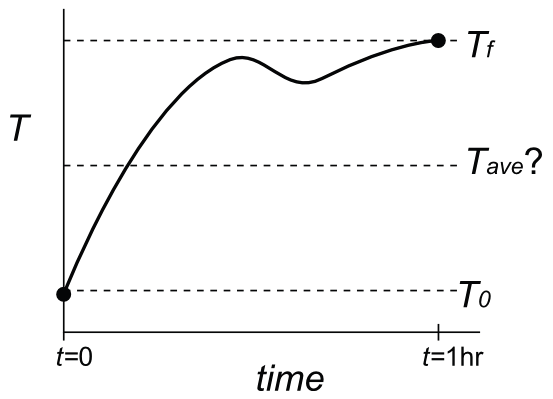

**Figure 4: Hypothetical situation where neither the final temperature, nor the average of initial and final temperatures gives an accurate representation of the temperature over the time step. This situation can be encountered in dynamic systems like CSP plants.**

To remedy this situation, System Advisor adjusts the total absorbed energy by subtracting the amount of energy that contributed to changing the energy state of the plant (i.e. the "transient energy"). The transient energy is calculated in Eq.[2.24].

$$\begin{array}{rcl}E_{trans}&=&\left(\overline{V}_{hdr,h}\;\rho_{hf,h}\;c_{ htf,h}+(mc)_{bal,h}\right)\;(T_{sys,h}-T_{sys,h,0})\\ &&+\left(\overline{V}_{hdr,c}\;\rho_{hf,c}\;c_{htf,c}\;c_{htf,c}+(mc)_{bal,c} \right)\;(T_{sys,c}-T_{sys,c,0})\\ &&+\sum_{i=1}^{N_{sca}}\left(A_{cs,i}\;L_{i}\;\rho_{htf,i}\;c_{htf,i}+L_{i}\;( mc)_{bal,sca,i}\right)\cdot(\overline{T}_{i}-\overline{T}_{i,0})\cdot N_{loops} \end{array} \tag{2.24}$$

Equation [2.24] consists of three parts; the first and second terms measure the energy that contributes to changing the "hot" and "cold" parts of the system, respectively (i.e. the header HTF volume and piping between the solar field and the power cycle), while the third term measures the energy contributing to changing the temperature of the HTF, piping, and insulation in the collector loops.

Included in the thermal inertia calculations are the hot and cold header volume plus supplemental runner pipe $\left(\overline{V}_{hdr}\right)$ and the user-specified thermal mass terms $(mc)_{bal,h}$ and $(mc)_{bal,c}$ described previously. The collector thermal inertia term represents the sum of HTF mass for all collectors in all loops, and is increased by the length-specific thermal inertia term $(mc)_{bal,sca,i}$ also discussed previously. The energy state is relative to the temperature from the previous time step - $\left(T_{sys,h,0}\right)$ for the hot header and $\left(T_{sys,c,0}\right)$ for the cold header.

The energy value calculated in Eq.[2.24] is subtracted from the total absorbed energy in the solar field to determine the total available energy from the solar field during the given time step. The mass flow rate is recalculated based on the energy available from the field.

$$\dot{m}_{A,sf}=\frac{\dot{q}_{A,sf}}{c_{htf,ave}\left(T_{sys,h}-T_{sf,in}\right)} \tag{2.25}$$

_Where:_

$$\dot{q}_{A,sf}=\dot{q}_{sf}-\frac{E_{trans}}{\Delta t}$$

The temperature $T_{sf,in}$ represents the inlet HTF temperature to the solar field and $T_{sys,h}$ is the return temperature to the power cycle calculated in Eq.[2.11]. The return temperature calculation presented in Eq. [2.11] uses the heat-loss adjusted loop outlet temperature rather than the temperature at the immediate outlet of the field loops. Thermal losses from the header and runner piping are accounted for as part of the loop outlet temperature by using the user-specified piping loss coefficient $\lambda_{hl}$ from the Parasities page and the total transport piping surface area $A_{pipe,tot}$ calculated by the model.

$$T_{loop,out}^{*}=T_{loop,out}-\frac{\lambda_{hl}\ A_{pipe,tot}\ \left(T_{loop,out}-T_{amb}\right)}{\dot{m}_{htf}\ c_{htf,ave}} \tag{2.26}$$

## 2.3 Collector Assembly and Field Optics

The collector model and optical calculations used in the physical trough model are based on the collector model in System Advisor's empirical trough model. System Advisor defines the collector as the portion of the solar field that reflects irradiation to the receiver. This equipment is distinct from the receiver component that consists of an evacuated glass envelope and tube receiver, as shown in Figure 5. The optical calculations for the collector model extend to the point of determining the magnitude of solar flux that is incident on the receiver.

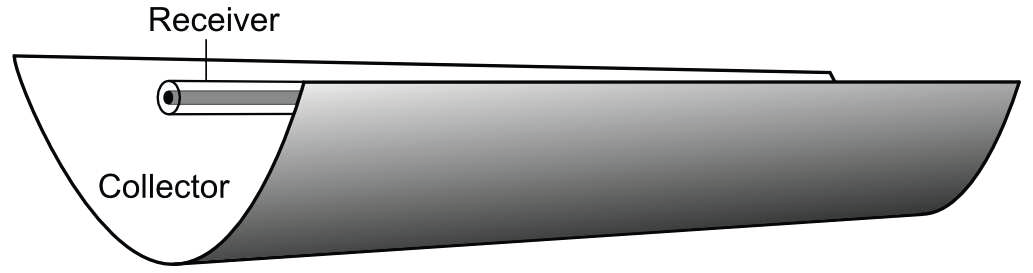

**Figure 5: The trough includes both a collector to reflect light and a receiver to absorb and transport heat.**

To determine the flux incident on the receiver, we must consider both constant optical losses and variable optical losses that change with solar position. The total irradiation on the field is a function of the equivalent aperture area of all of the collectors in the field, the strength of the solar insolation, and the angle at which the irradiation strikes the aperture plane. The equivalent aperture area refers to the total reflective area of the collectors that is projected on the plane of the collector aperture. This area is distinct from the curved reflective surface. Area that is lost due to gaps between mirror modules or non-reflective structural components is not included in the aperture area value. Thus, though the structure of the collector may occupy $100m$ lengthwise and $5m$ across the aperture, for example, the total reflective aperture area may be somewhat less than $100\times 5=500m^{2}$ after spaces, gaps, and structural area are accounted for.

When the solar irradiation is not normal to the plane of the collector aperture, losses are incurred that scale with the acuteness of incidence angle. The incidence angle $\theta$ is equal to the difference in angles between the normal to the aperture plane and the solar irradiation. This is depicted in Figure 6.

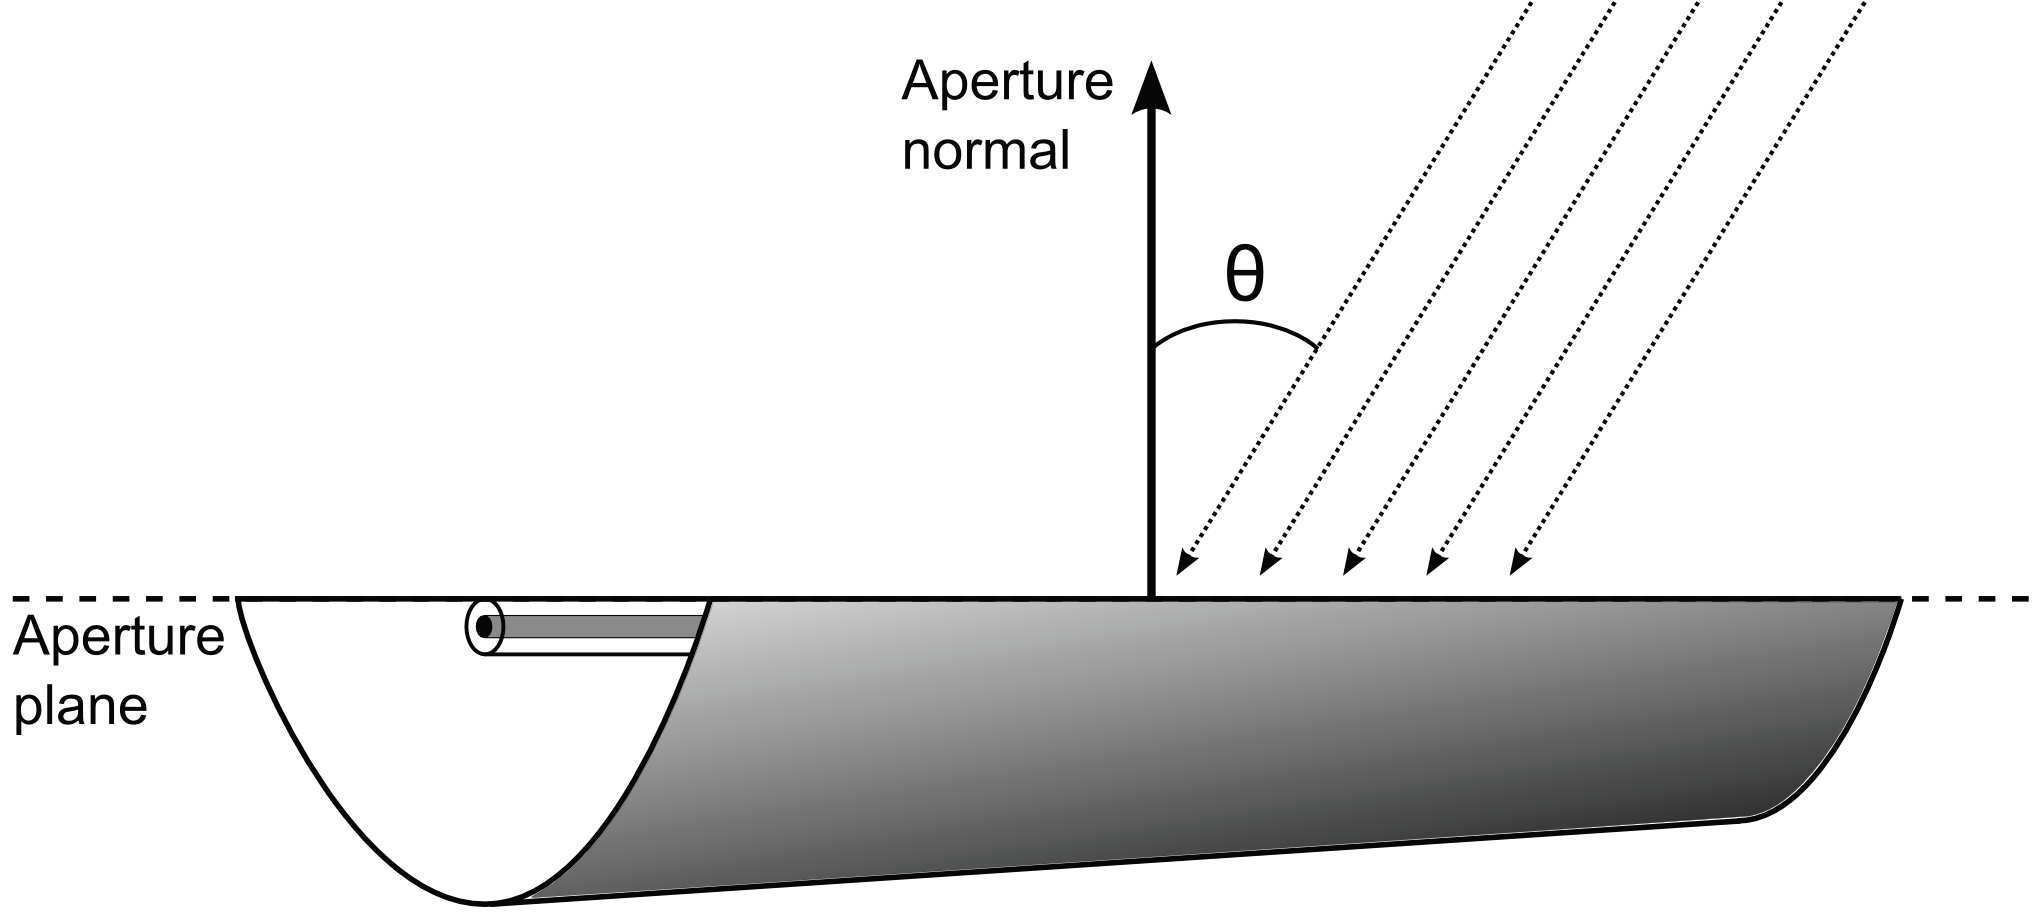

**Figure 6: The angle between the solar irradiation and the normal vector to the collector aperture plane.**

The incidence angle is a function of solar position and the collector tracking angle. To find the solar position for a particular plant at latitude $phi$ and longitude $psi$, we first calculate the solar time $t_{sol}$[5].

$$B = (day-1)\ \frac{360}{365}$$
$$EOT = 9.2\left (0.000075+0.001868\ \cos B - 0.032077\sin B - 0.014615\ \cos(2B)-0.04089\ \sin(2B)\right)$$
$$shift = zone\cdot 15-\psi$$
$$t_{sol} = hour+\frac{shift}{15}+\frac{EOT}{60} \tag{2.27}$$